# generate_error_table

## imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import glob
import os

%matplotlib inline

## load data

In [2]:
df0 = pd.read_csv('final_data/equaldistinctcount_20230221.csv')
df1 = pd.read_csv('final_data/equiheight_20230221.csv')
df2 = pd.read_csv('final_data/equiwidth_20230221.csv')
df3 = pd.read_csv('final_data/gdy_20230221.csv')
df4 = pd.read_csv('final_data/maxdiff_20230221.csv')
df5 = pd.read_csv('final_data/maxdiffarea_20230309.csv')
df = pd.concat([df0, df1, df2, df3, df4, df5], axis=0)

## generate errors

In [3]:
def generate_errors(df):
    df = df.copy()  # Convenience
    
    df['absolute_error'] = np.absolute(df['estimated_output'] - df['real_output'])
    df['relative_error'] = df['absolute_error'] / df['real_output']
    df['x'] = df['estimated_output'] / df['real_output']
    df['1/x'] = 1 / df['x']
    df['q_error'] = df[['x','1/x']].max(axis=1)
    df['real_output_lower_bound'] = df['real_output']
    df['real_output_lower_bound'] = df['real_output_lower_bound'].clip(1)
    df['estimated_output_lower_bound'] = df['estimated_output']
    df['estimated_output_lower_bound'] = df['estimated_output_lower_bound'].clip(1)
    df['pseudo_x'] = df['estimated_output_lower_bound'] / df['real_output_lower_bound']
    df['pseudo_1/x'] = 1 / df['pseudo_x']
    df['pseudo_q_error'] = df[['pseudo_x','pseudo_1/x']].max(axis=1)
    df['mean_squared_error'] = df['absolute_error'] ** 2
    df.drop(['x', '1/x', 'real_output_lower_bound', 'estimated_output_lower_bound', 'pseudo_x', 'pseudo_1/x'], axis=1, inplace = True)

    return df

## result

### with_NULLs

In [ ]:
df_with_errors = generate_errors(df)
df_with_errors

df_with_errors.groupby([#"operator_type",
                        "benchmark",
                        "histogram"]).agg(root_mean_squared_error=("mean_squared_error", lambda x: np.sqrt(np.mean(x))),
                                          mean_absolute_error=("absolute_error", np.mean),
                                          mean_relative_error=("relative_error", np.mean),
                                          mean_q_error=("q_error", np.mean),
                                          mean_pseudo_q_error=("pseudo_q_error", np.mean))

### without_NULLs

Removed -588 (6.81%) rows because the 'real_output' cell was zero.
Removed -2588 (29.96%) rows because the 'estimated_output' cell was zero.


root_mean_squared_error  \
operator_type benchmark histogram                                              
JoinHashRight JoinOrder EqualDistinctCountHistogram             1.648413e+05   
                        EquiHeightHistogram                     3.718452e+05   
                        EquiWidthHistogram                      4.386096e+05   
                        GDYHistogram                            4.598774e+05   
                        MaxDiffAreaHistogram                    1.038362e+05   
                        MaxDiffFrequencyHistogram               2.069615e+05   
              TPC-DS    EqualDistinctCountHistogram             2.216647e+06   
                        EquiHeightHistogram                     2.183605e+06   
                        EquiWidthHistogram                      2.640754e+06   
                        GDYHistogram                            2.557493e+06   
                        MaxDiffAreaHistogram                    2.289049e+06   
                        MaxDiffFrequencyHistogram               2.328995e+06   
              TPC-H     EqualDistinctCountHistogram             1.015760e+06   
                        EquiHeightHistogram                     5.393710e+06   
                        EquiWidthHistogram                      5.402462e+06   
                        GDYHistogram                            5.393844e+06   
                        MaxDiffAreaHistogram                    5.382964e+06   
                        MaxDiffFrequencyHistogram               6.237605e+06   

                                                     mean_absolute_error  \
operator_type benchmark histogram                                          
JoinHashRight JoinOrder EqualDistinctCountHistogram         8.605534e+04   
                        EquiHeightHistogram                 1.211418e+05   
                        EquiWidthHistogram                  1.805818e+05   
                        GDYHistogram                        2.241147e+05   
                        MaxDiffAreaHistogram                5.840895e+04   
                        MaxDiffFrequencyHistogram           1.000172e+05   
              TPC-DS    EqualDistinctCountHistogram         1.396391e+06   
                        EquiHeightHistogram                 1.605035e+06   
                        EquiWidthHistogram                  1.931107e+06   
                        GDYHistogram                        1.739126e+06   
                        MaxDiffAreaHistogram                1.611515e+06   
                        MaxDiffFrequencyHistogram           1.585138e+06   
              TPC-H     EqualDistinctCountHistogram         7.227289e+05   
                        EquiHeightHistogram                 2.412886e+06   
                        EquiWidthHistogram                  2.562732e+06   
                        GDYHistogram                        2.424657e+06   
                        MaxDiffAreaHistogram                2.363551e+06   
                        MaxDiffFrequencyHistogram           3.188598e+06   

                                                     mean_relative_error  \
operator_type benchmark histogram                                          
JoinHashRight JoinOrder EqualDistinctCountHistogram          5197.374866   
                        EquiHeightHistogram                     2.184882   
                        EquiWidthHistogram                      4.051988   
                        GDYHistogram                            2.616635   
                        MaxDiffAreaHistogram                 2865.781992   
                        MaxDiffFrequencyHistogram               3.059257   
              TPC-DS    EqualDistinctCountHistogram            20.966536   
                        EquiHeightHistogram                    26.316768   
                        EquiWidthHistogram                     15.164143   
                        GDYHistogram                            0.710944   
                   

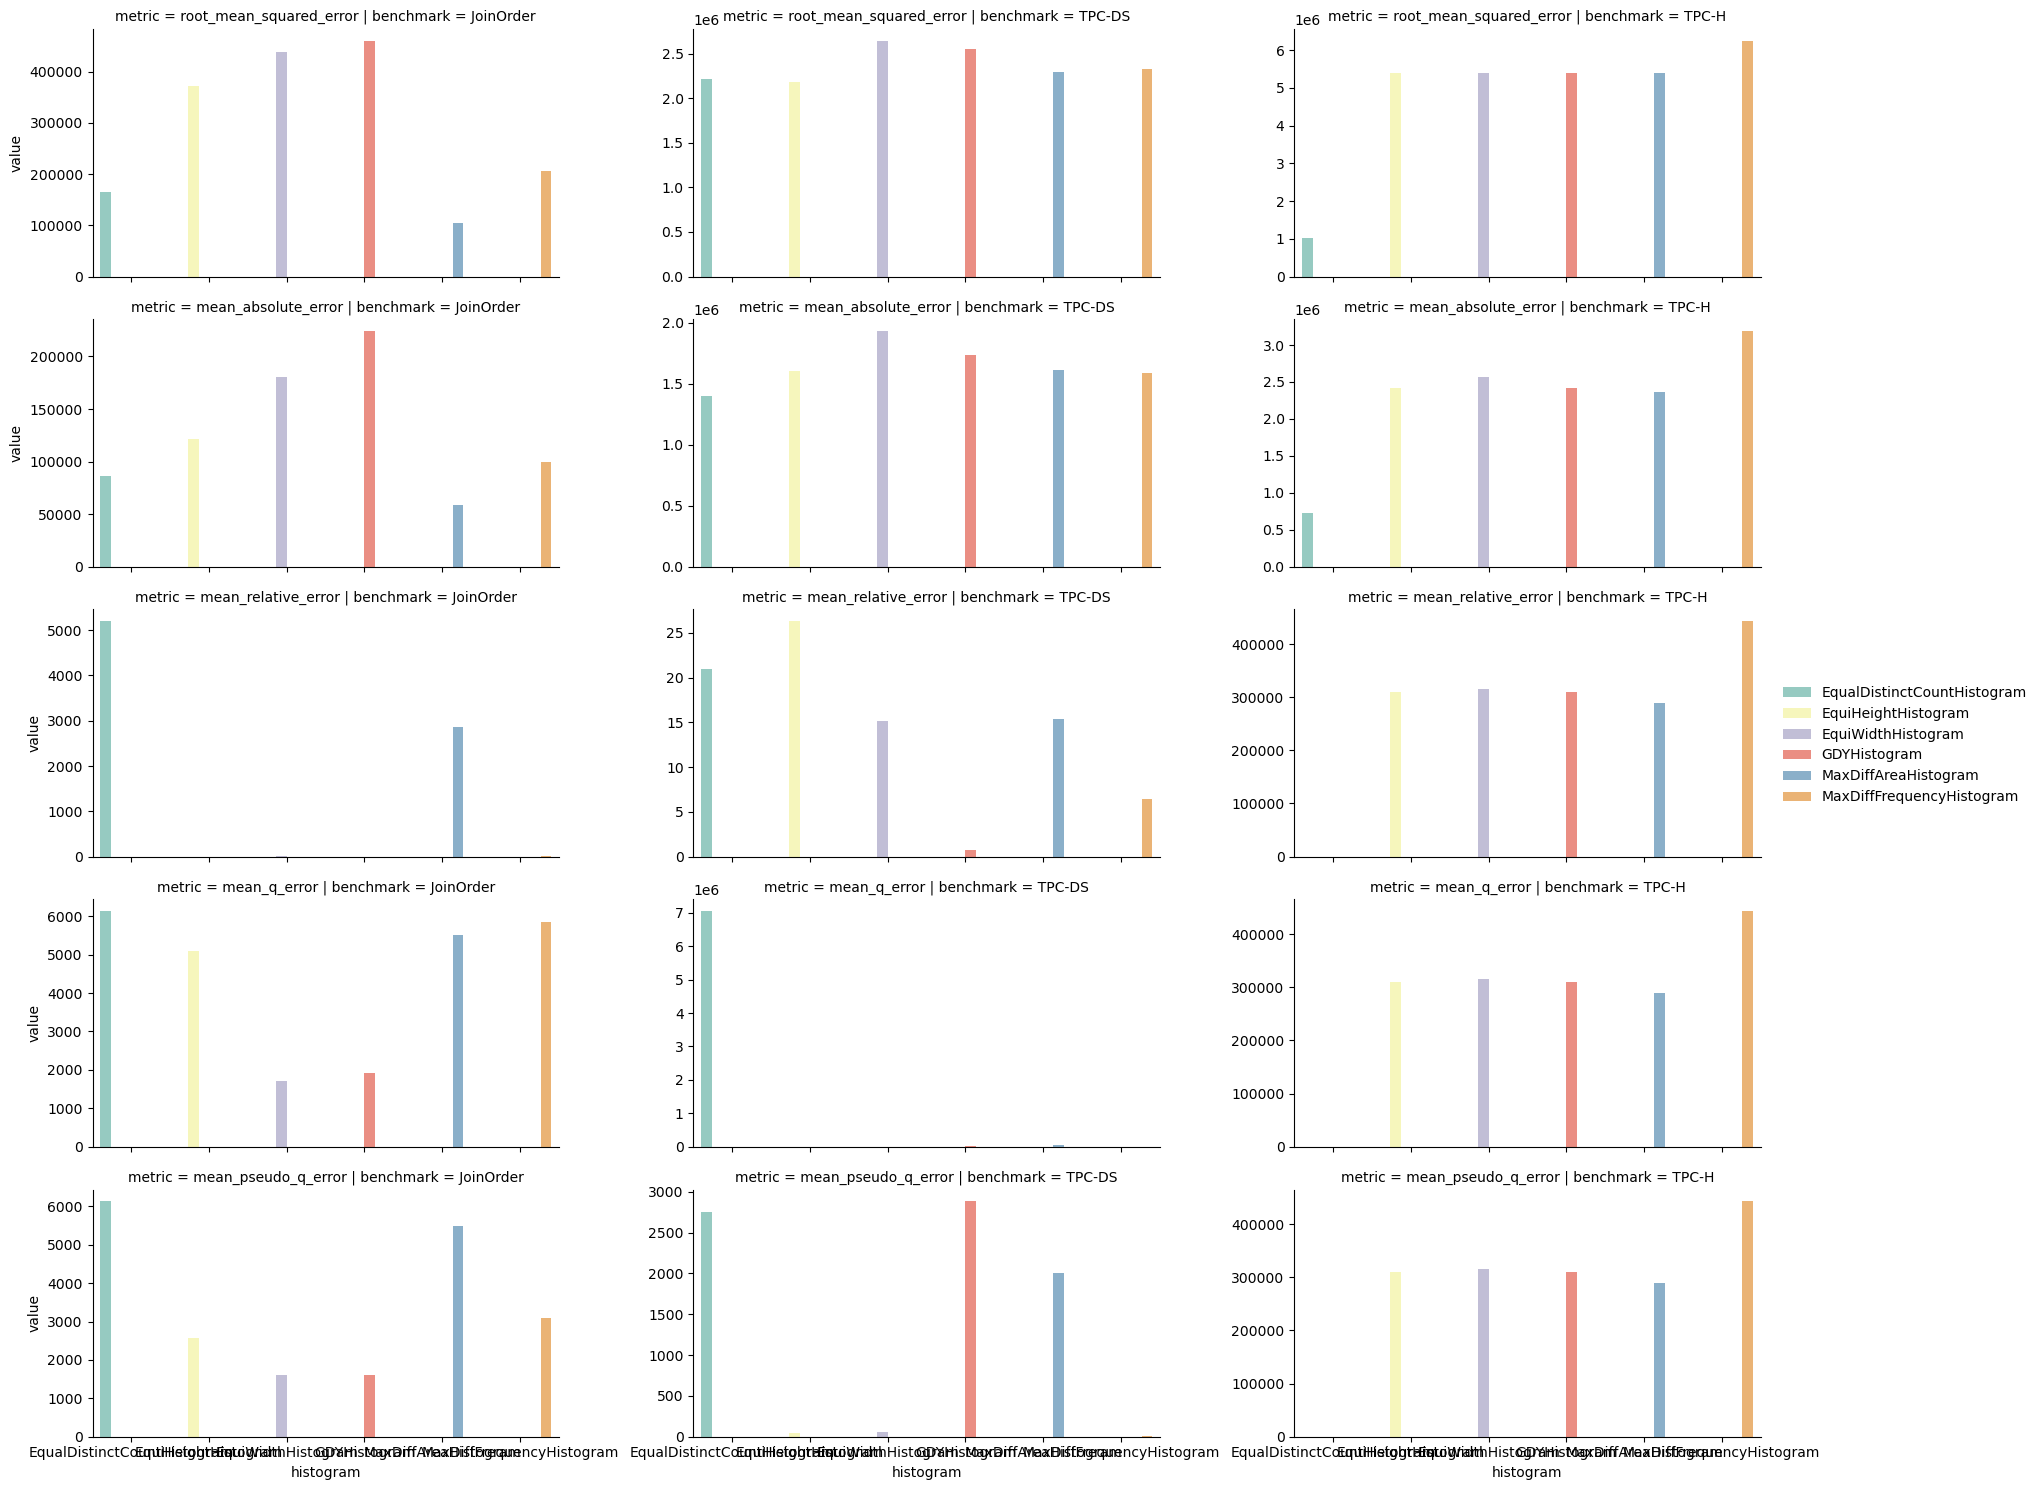

root_mean_squared_error  \
operator_type benchmark histogram                                              
JoinHashLeft  JoinOrder EqualDistinctCountHistogram             6.451430e+05   
                        EquiHeightHistogram                     6.614360e+05   
                        EquiWidthHistogram                      6.457887e+05   
                        GDYHistogram                            6.433618e+05   
                        MaxDiffAreaHistogram                    5.839388e+05   
                        MaxDiffFrequencyHistogram               6.744720e+05   
              TPC-DS    EqualDistinctCountHistogram             1.790412e+06   
                        EquiHeightHistogram                     1.805132e+06   
                        EquiWidthHistogram                      1.910999e+06   
                        GDYHistogram                            1.889920e+06   
                        MaxDiffAreaHistogram                    1.732310e+06   
                        MaxDiffFrequencyHistogram               1.610497e+06   
              TPC-H     EqualDistinctCountHistogram             1.120343e+06   
                        EquiHeightHistogram                     9.832002e+06   
                        EquiWidthHistogram                      1.085628e+07   
                        GDYHistogram                            1.022009e+07   
                        MaxDiffAreaHistogram                    9.595266e+06   
                        MaxDiffFrequencyHistogram               1.217274e+07   

                                                     mean_absolute_error  \
operator_type benchmark histogram                                          
JoinHashLeft  JoinOrder EqualDistinctCountHistogram         2.051670e+05   
                        EquiHeightHistogram                 1.922867e+05   
                        EquiWidthHistogram                  1.857681e+05   
                        GDYHistogram                        1.852867e+05   
                        MaxDiffAreaHistogram                1.834876e+05   
                        MaxDiffFrequencyHistogram           2.050895e+05   
              TPC-DS    EqualDistinctCountHistogram         9.764778e+05   
                        EquiHeightHistogram                 9.912913e+05   
                        EquiWidthHistogram                  1.082451e+06   
                        GDYHistogram                        9.824169e+05   
                        MaxDiffAreaHistogram                9.188429e+05   
                        MaxDiffFrequencyHistogram           8.447833e+05   
              TPC-H     EqualDistinctCountHistogram         5.280497e+05   
                        EquiHeightHistogram                 2.375266e+06   
                        EquiWidthHistogram                  2.991749e+06   
                        GDYHistogram                        2.579091e+06   
                        MaxDiffAreaHistogram                2.288477e+06   
                        MaxDiffFrequencyHistogram           3.426004e+06   

                                                     mean_relative_error  \
operator_type benchmark histogram                                          
JoinHashLeft  JoinOrder EqualDistinctCountHistogram           707.834068   
                        EquiHeightHistogram                  1085.204403   
                        EquiWidthHistogram                    891.375855   
                        GDYHistogram                          635.298074   
                        MaxDiffAreaHistogram                  546.860908   
                        MaxDiffFrequencyHistogram            1077.347458   
              TPC-DS    EqualDistinctCountHistogram            42.082461   
                        EquiHeightHistogram                     7.591127   
                        EquiWidthHistogram                     58.097576   
                        GDYHistogram                            1.878710   
                   

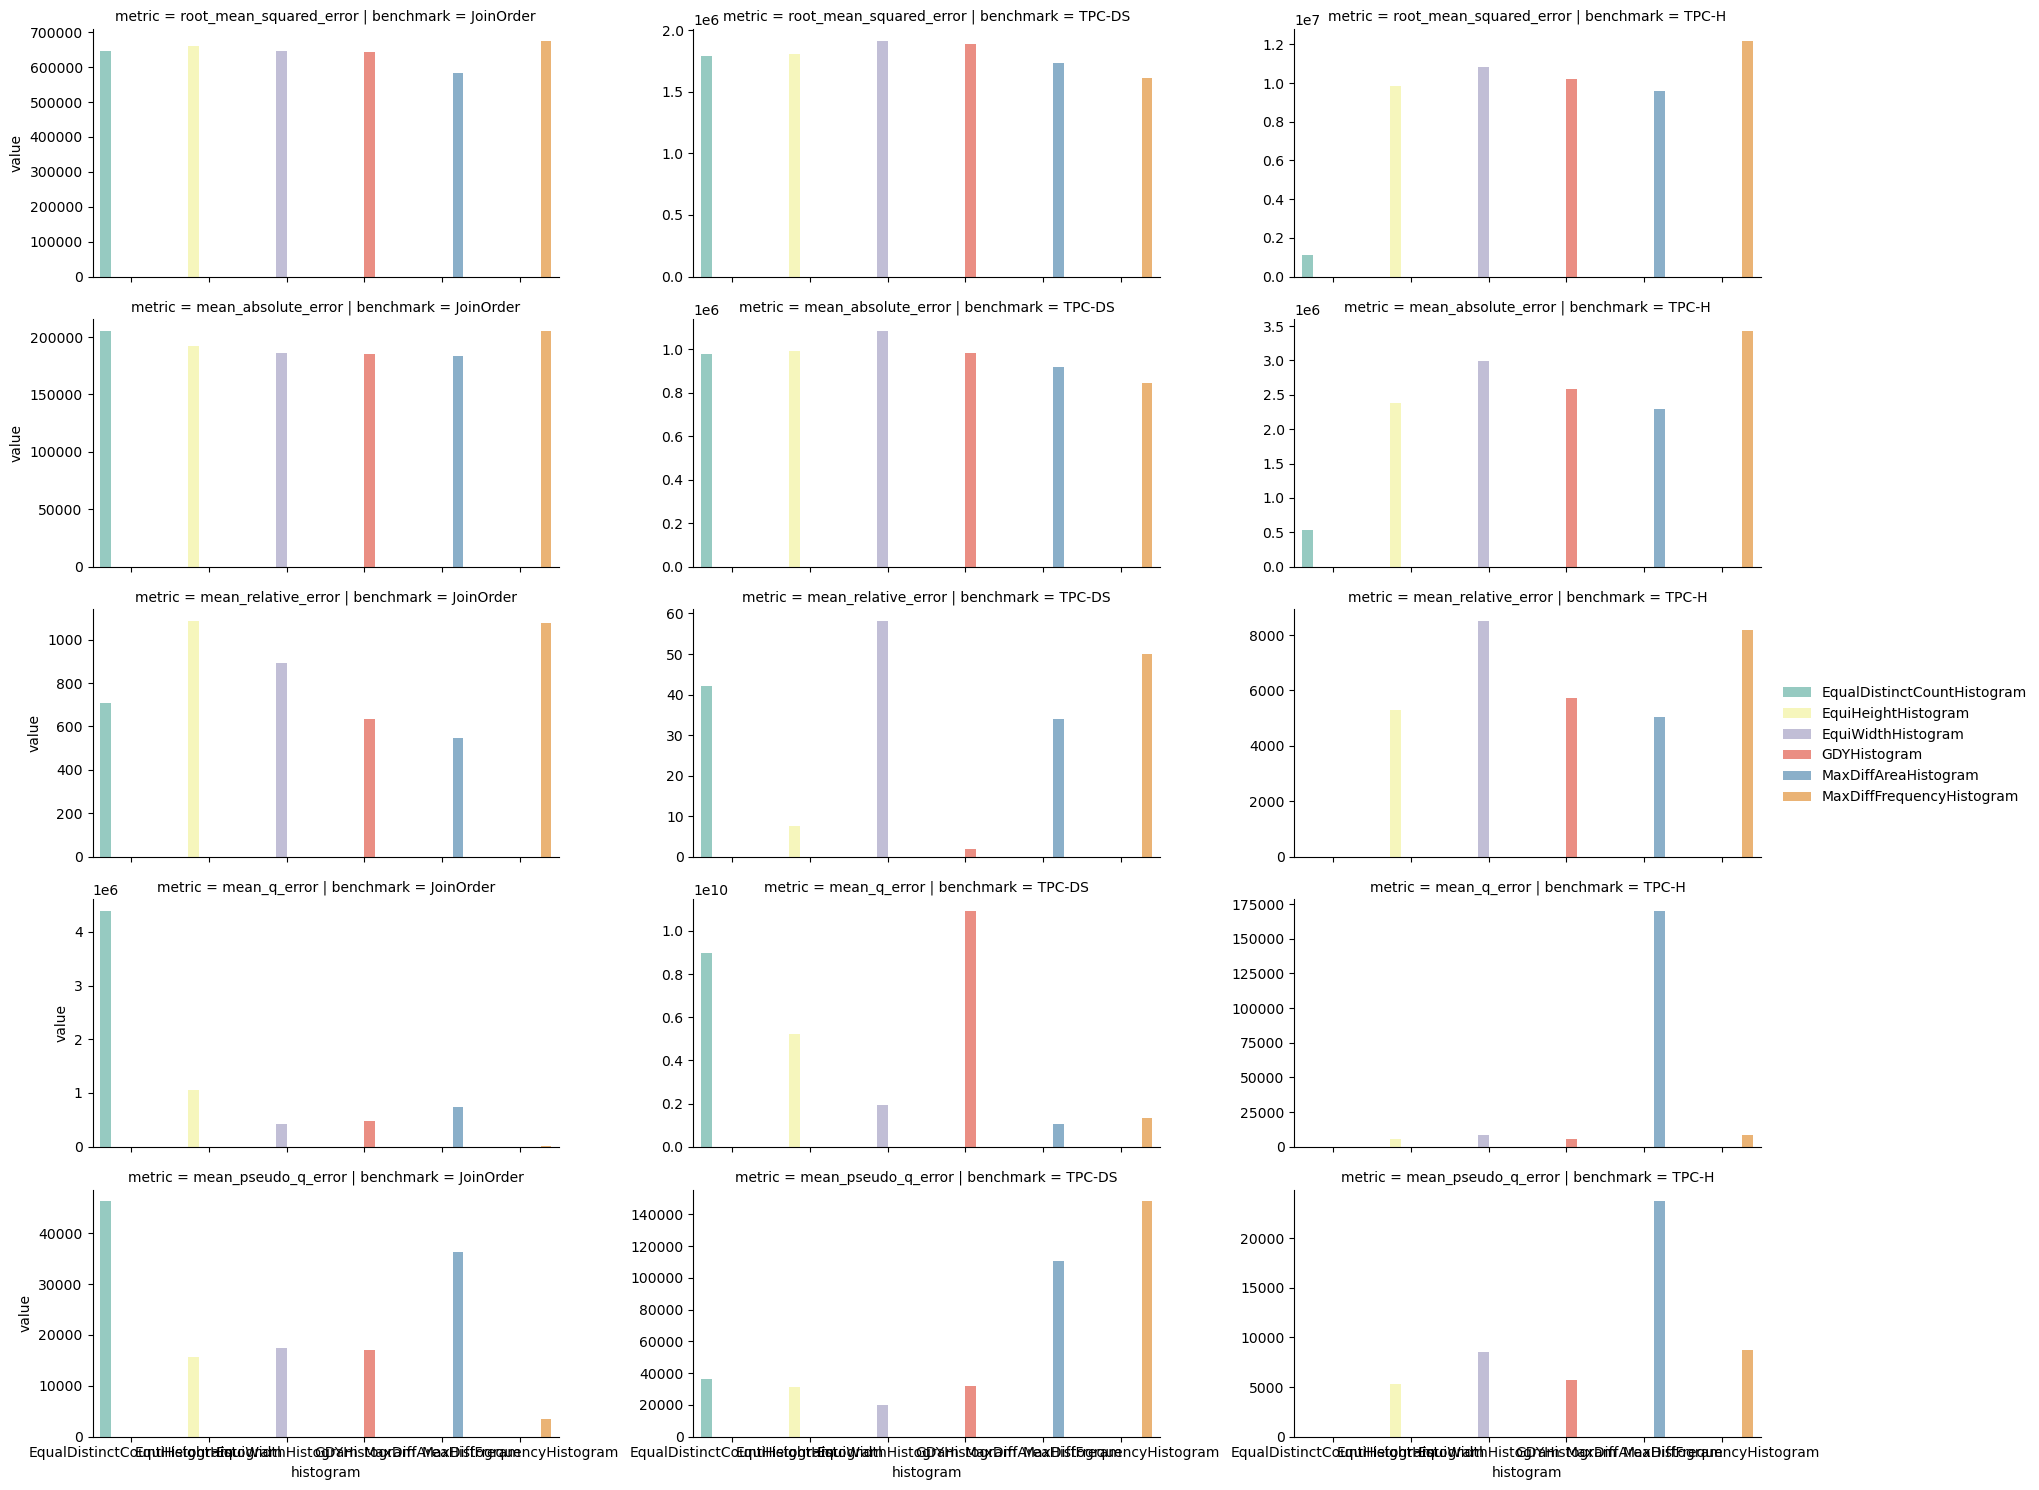

root_mean_squared_error  \
operator_type benchmark histogram                                              
TableScan     JoinOrder EqualDistinctCountHistogram             2.040983e+05   
                        EquiHeightHistogram                     1.388008e+05   
                        EquiWidthHistogram                      1.440398e+05   
                        GDYHistogram                            1.436740e+05   
                        MaxDiffAreaHistogram                    2.146270e+05   
                        MaxDiffFrequencyHistogram               1.371873e+05   
              TPC-DS    EqualDistinctCountHistogram             1.899286e+02   
                        EquiHeightHistogram                     1.615211e+04   
                        EquiWidthHistogram                      2.016913e+02   
                        GDYHistogram                            1.489910e+04   
                        MaxDiffAreaHistogram                    1.205178e+04   
                        MaxDiffFrequencyHistogram               2.336349e+01   
              TPC-H     EqualDistinctCountHistogram             6.733439e+04   
                        EquiHeightHistogram                     3.684352e+06   
                        EquiWidthHistogram                      3.498710e+06   
                        GDYHistogram                            2.919873e+05   
                        MaxDiffAreaHistogram                    3.152765e+05   
                        MaxDiffFrequencyHistogram               4.221939e+05   

                                                     mean_absolute_error  \
operator_type benchmark histogram                                          
TableScan     JoinOrder EqualDistinctCountHistogram         56577.314604   
                        EquiHeightHistogram                 14101.430622   
                        EquiWidthHistogram                  15507.931102   
                        GDYHistogram                        15342.586159   
                        MaxDiffAreaHistogram                52085.235443   
                        MaxDiffFrequencyHistogram           11040.301938   
              TPC-DS    EqualDistinctCountHistogram            34.919788   
                        EquiHeightHistogram                  2239.702213   
                        EquiWidthHistogram                     41.801736   
                        GDYHistogram                         1965.732613   
                        MaxDiffAreaHistogram                 1260.920934   
                        MaxDiffFrequencyHistogram               9.628654   
              TPC-H     EqualDistinctCountHistogram         23766.125000   
                        EquiHeightHistogram                689165.541667   
                        EquiWidthHistogram                 656217.425000   
                        GDYHistogram                       105124.265100   
                        MaxDiffAreaHistogram               115831.283425   
                        MaxDiffFrequencyHistogram          159617.252155   

                                                     mean_relative_error  \
operator_type benchmark histogram                                          
TableScan     JoinOrder EqualDistinctCountHistogram             2.884376   
                        EquiHeightHistogram                     0.230071   
                        EquiWidthHistogram                      0.181582   
                        GDYHistogram                            0.182184   
                        MaxDiffAreaHistogram                    2.093566   
                        MaxDiffFrequencyHistogram               1.942405   
              TPC-DS    EqualDistinctCountHistogram             0.091641   
                        EquiHeightHistogram                     0.166579   
                        EquiWidthHistogram                      0.119742   
                        GDYHistogram                            0.147792   
                   

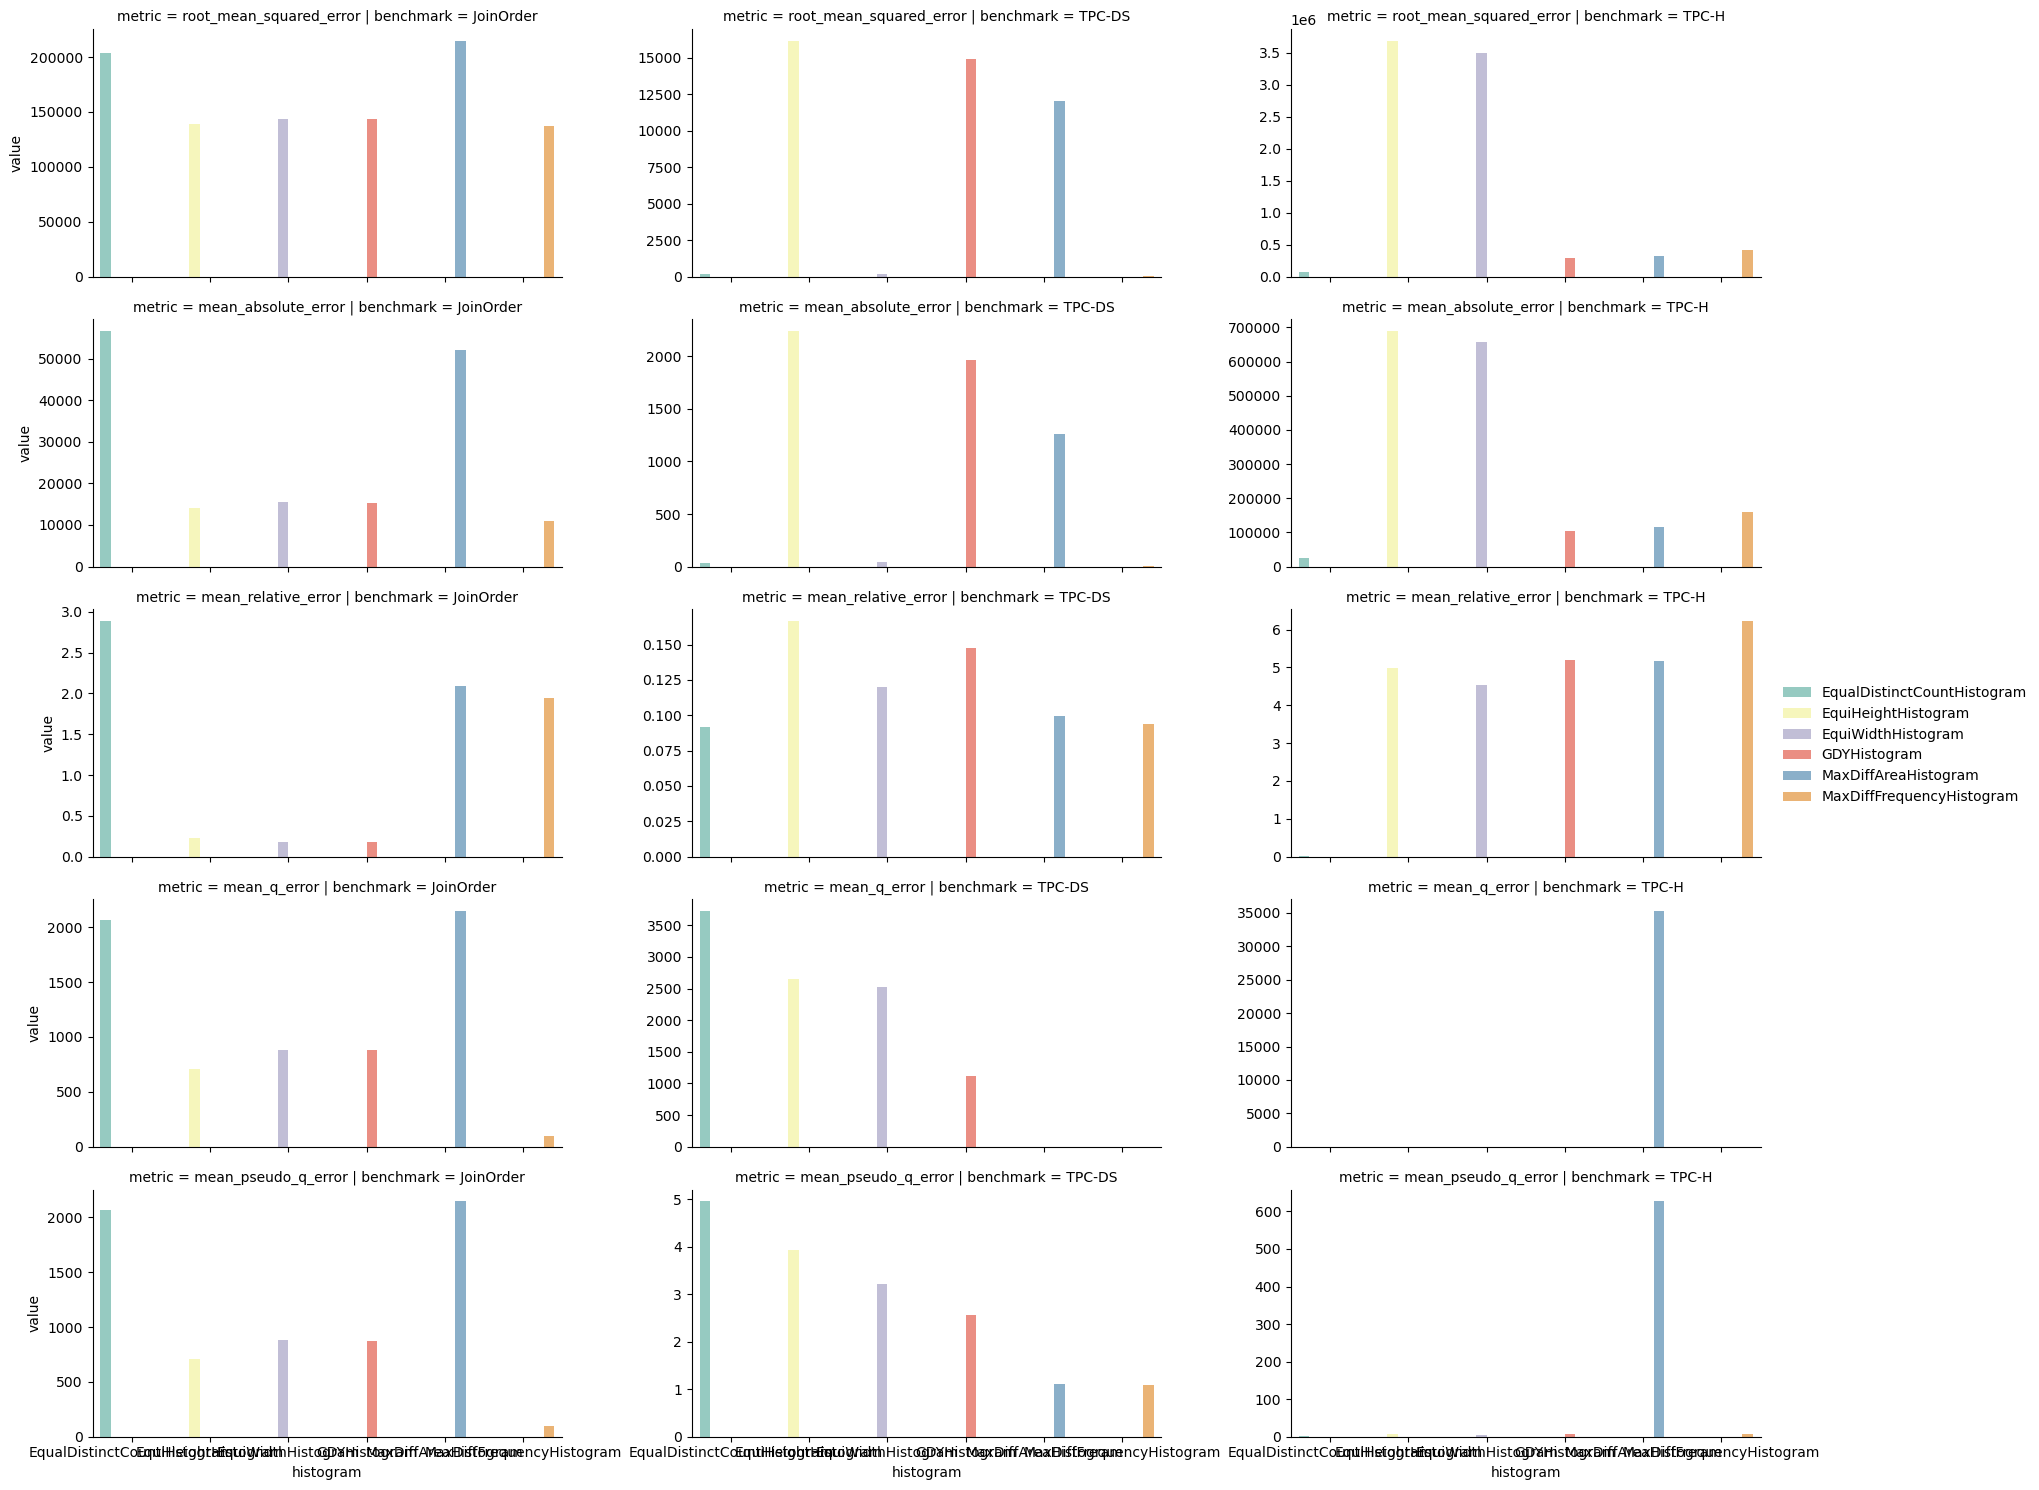

root_mean_squared_error  \
operator_type benchmark histogram                                              
Aggregate     TPC-DS    EqualDistinctCountHistogram                 101989.0   
                        EquiHeightHistogram                         101989.0   
                        GDYHistogram                                101989.0   
                        MaxDiffAreaHistogram                        101989.0   
                        MaxDiffFrequencyHistogram                   101989.0   
              TPC-H     EqualDistinctCountHistogram               44986052.0   
                        EquiHeightHistogram                       44986052.0   
                        EquiWidthHistogram                        44986052.0   
                        GDYHistogram                              44986052.0   
                        MaxDiffAreaHistogram                      44986052.0   
                        MaxDiffFrequencyHistogram                 44986052.0   

                                                     mean_absolute_error  \
operator_type benchmark histogram                                          
Aggregate     TPC-DS    EqualDistinctCountHistogram             101989.0   
                        EquiHeightHistogram                     101989.0   
                        GDYHistogram                            101989.0   
                        MaxDiffAreaHistogram                    101989.0   
                        MaxDiffFrequencyHistogram               101989.0   
              TPC-H     EqualDistinctCountHistogram           44986052.0   
                        EquiHeightHistogram                   44986052.0   
                        EquiWidthHistogram                    44986052.0   
                        GDYHistogram                          44986052.0   
                        MaxDiffAreaHistogram                  44986052.0   
                        MaxDiffFrequencyHistogram             44986052.0   

                                                     mean_relative_error  \
operator_type benchmark histogram                                          
Aggregate     TPC-DS    EqualDistinctCountHistogram          9271.727273   
                        EquiHeightHistogram                  9271.727273   
                        GDYHistogram                         9271.727273   
                        MaxDiffAreaHistogram                 9271.727273   
                        MaxDiffFrequencyHistogram            9271.727273   
              TPC-H     EqualDistinctCountHistogram             2.999070   
                        EquiHeightHistogram                     2.999070   
                        EquiWidthHistogram                      2.999070   
                        GDYHistogram                            2.999070   
                        MaxDiffAreaHistogram                    2.999070   
                        MaxDiffFrequencyHistogram               2.999070   

                                                     mean_q_error  \
operator_type benchmark histogram                                   
Aggregate     TPC-DS    EqualDistinctCountHistogram   9272.727273   
                        EquiHeightHistogram           9272.727273   
                        GDYHistogram                  9272.727273   
                        MaxDiffAreaHistogram          9272.727273   
                        MaxDiffFrequencyHistogram     9272.727273   
              TPC-H     EqualDistinctCountHistogram      3.999070   
                        EquiHeightHistogram              3.999070   
                        EquiWidthHistogram               3.999070   
                        GDYHistogram                     3.999070   
                        MaxDiffAreaHistogram             3.999070   
                        MaxDiffFrequencyHistogram        3.999070   

                                                     mean_pseudo_q_error  
operator_type benchmark histogram                            

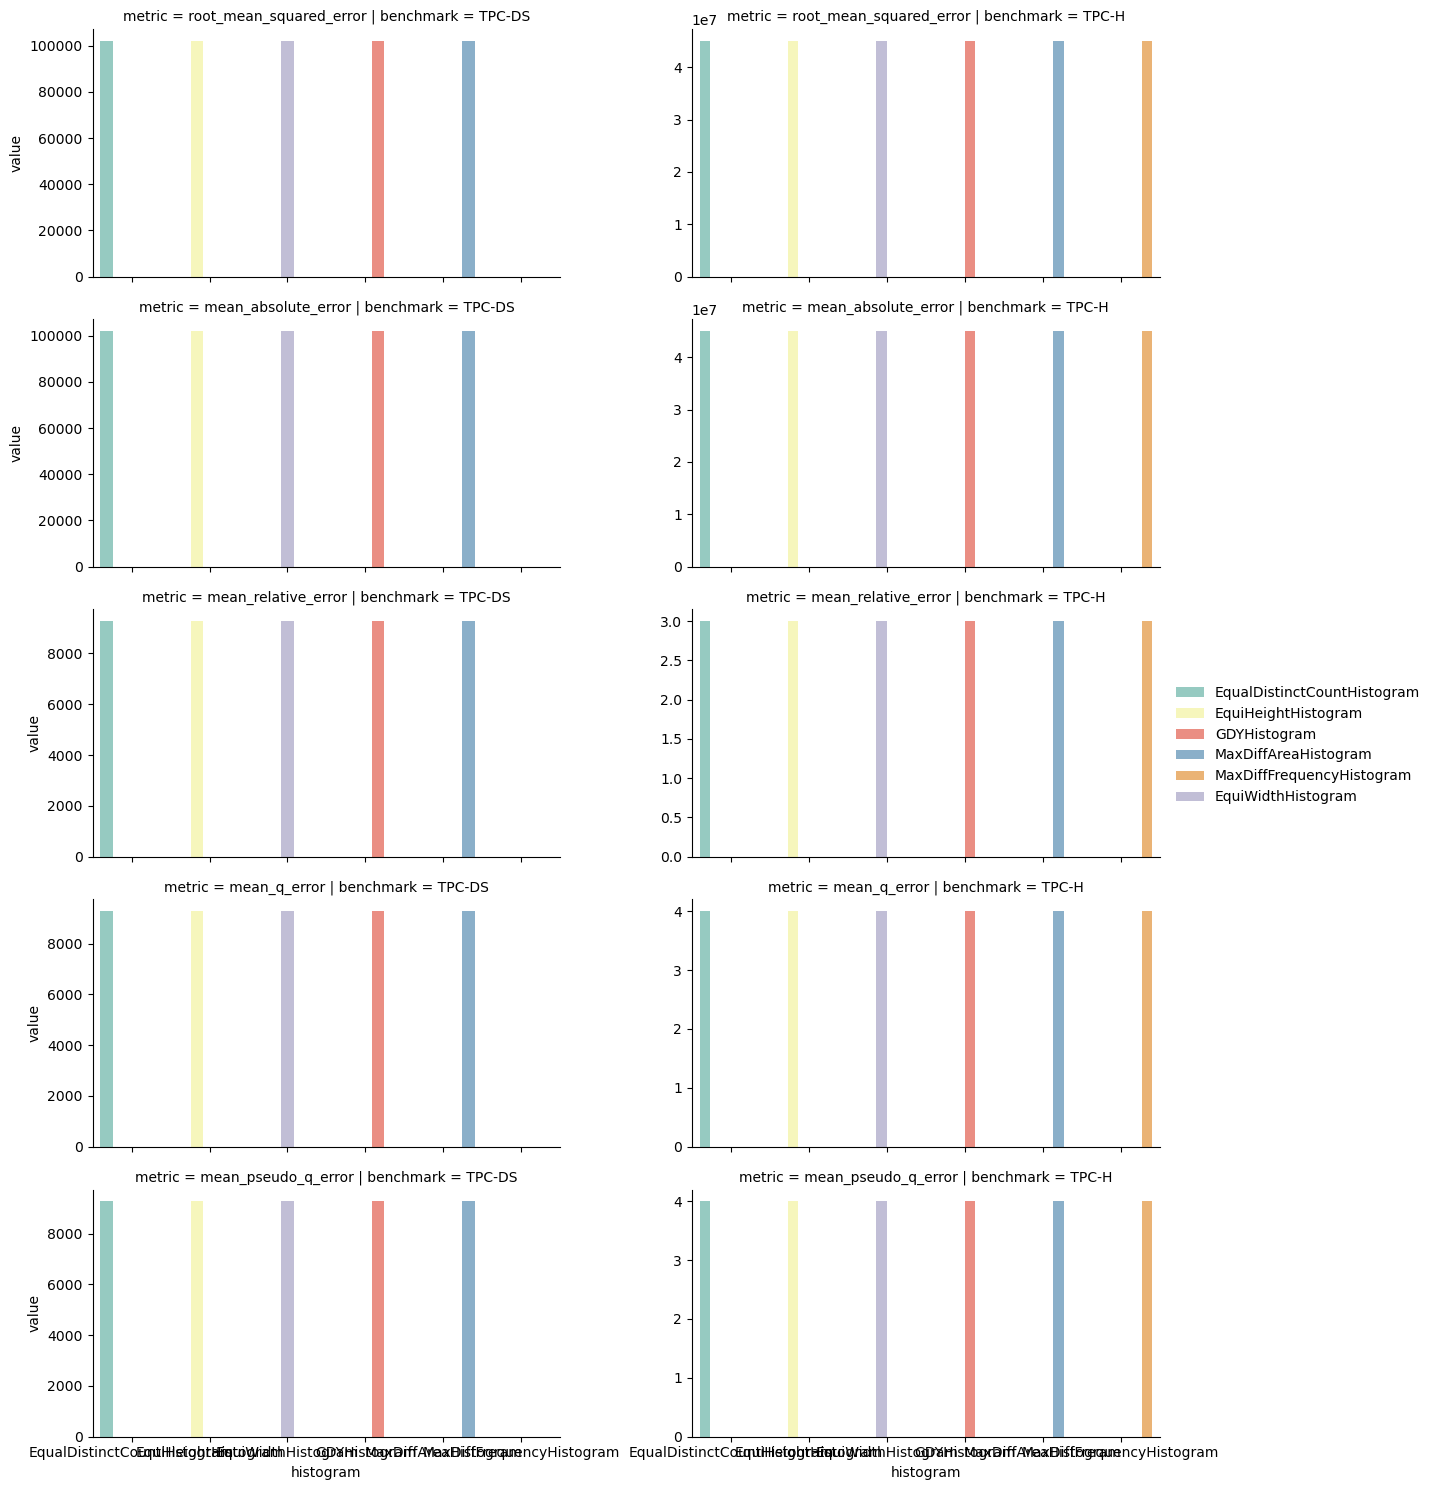

In [4]:
size_before = len(df)
df = df.drop(df[df.real_output == 0].index)
print(f"Removed {len(df)-size_before} ({(size_before-len(df))/size_before:.2%}) rows because the 'real_output' cell was zero.")
df = df.drop(df[df.estimated_output == 0].index)
print(f"Removed {len(df)-size_before} ({(size_before-len(df))/size_before:.2%}) rows because the 'estimated_output' cell was zero.")

df_with_errors = generate_errors(df)

# print as the resulting table is cut by Jupyter
for operator in pd.unique(df_with_errors.operator_type):
    filtered = df_with_errors.query("operator_type == @operator")
    result = filtered.groupby(["operator_type",
                               "benchmark",
                               "histogram"]).agg(root_mean_squared_error=("mean_squared_error", lambda x: np.sqrt(np.mean(x))),
                                                 mean_absolute_error=("absolute_error", np.mean),
                                                 mean_relative_error=("relative_error", np.mean),
                                                 mean_q_error=("q_error", np.mean),
                                                 mean_pseudo_q_error=("pseudo_q_error", np.mean))
    display(result)
    melted_results = pd.melt(result.reset_index(), id_vars=["benchmark", "histogram"],
                             value_vars=["root_mean_squared_error", "mean_absolute_error",
                                         "mean_relative_error", "mean_q_error", "mean_pseudo_q_error"],
                             var_name="metric")
    g = sns.FacetGrid(melted_results, col="benchmark", row="metric", sharey=False, aspect=2)
    g.map_dataframe(sns.barplot, x="histogram", y="value", hue="histogram", palette="Set3")
    g.add_legend()
    plt.savefig(f"{operator}_facet.pdf")
    plt.show()
    display(g)


## compare_operators

In [ ]:
grouped = df.groupby(["benchmark", "histogram", "query", "operator_type"]).size()

queries = df[["benchmark", "query"]].drop_duplicates()

# super inefficient, doesn't matter for now
op_counts = {}
for _, outer_benchmark, outer_query in queries.itertuples():
    for (_1, benchmark, histogram, query, operator_type, count) in grouped.reset_index().itertuples():
        if outer_benchmark == benchmark and outer_query == query:
            if (benchmark, query, operator_type) not in op_counts:
                op_counts[(benchmark, query, operator_type)] = count
                continue

            if op_counts[(benchmark, query, operator_type)] != count:
                print(f"WARNING: different value of {count} (previously {op_counts[(benchmark, query, operator_type)]}) for {benchmark}, query {query}, op {operator_type}")
